In [16]:
#import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Reading the data 
pima = pd.read_csv("pima.csv")
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#defining column names
column = ['pregnant','glucose','bp','skin','insulin_level','bmi','pedigree','age','diabetes_label']

In [6]:
#passing in column names
data = pd.read_csv("pima.csv",names=column)
data.head()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
data.tail()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
#getting the no. of rows and columns
data.shape

(768, 9)

In [9]:
data.describe()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#checking for null values
data.isna().sum()

pregnant          0
glucose           0
bp                0
skin              0
insulin_level     0
bmi               0
pedigree          0
age               0
diabetes_label    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant          768 non-null int64
glucose           768 non-null int64
bp                768 non-null int64
skin              768 non-null int64
insulin_level     768 non-null int64
bmi               768 non-null float64
pedigree          768 non-null float64
age               768 non-null int64
diabetes_label    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#get the number of diabetic and non_diabetic
data['diabetes_label'].value_counts()

0    500
1    268
Name: diabetes_label, dtype: int64

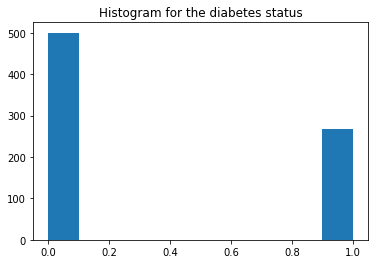

In [22]:
#visualize the diabetes status using histogram
plt.title("Histogram for the diabetes status")
plt.hist(data['diabetes_label'])
plt.show()

In [23]:
#getting the correlation with other attributes
data.corr()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin_level,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes_label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


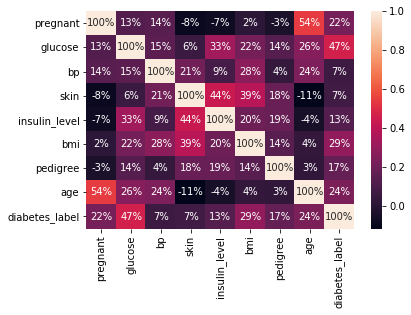

In [72]:
#visualize the correlation
sns.heatmap(data.corr(),annot=True,fmt='.0%')
plt.show()

# Model builiding

In [39]:
#import the required classifiers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
features = data.drop("diabetes_label",axis=1)
features.head()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
X = features
y = data['diabetes_label']

In [43]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [61]:
#Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.85904815,  2.54476915,  0.43070305, ...,  1.53810427,
         2.84152033, -0.92178738],
       [-0.55469213, -0.39587758,  0.32564243, ...,  0.29616283,
        -0.21344264, -0.83179039],
       [ 0.0540199 , -1.38674767, -0.30472127, ...,  0.34957966,
        -0.25355832, -0.6517964 ],
       ...,
       [-0.85904815, -0.7794402 , -0.40978189, ..., -0.99919545,
        -0.6578009 , -0.92178738],
       [-0.85904815, -0.42784113,  0.43070305, ...,  0.81697698,
        -0.85220763, -0.56179941],
       [ 1.88015599,  0.08357569,  0.53576367, ..., -0.50508972,
         0.11982604,  1.14814346]])

In [62]:
#fitting various models
def models(X_train,y_train):
    #Logistic Regression
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)
    
    #Decision Tree
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    
    #Random Forest
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train,y_train)
    
    #Getting accuracy
    print("[0] Logistic Regression accuracy", logistic.score(X_train,y_train))
    print("[1] Decision Tree accuracy", tree.score(X_train,y_train))
    print("[2] Random Forest accuracy", forest.score(X_train,y_train))
    
    return logistic, tree, forest
    

In [63]:
model = models(X_train,y_train)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0] Logistic Regression accuracy 0.7672253258845437
[1] Decision Tree accuracy 1.0
[2] Random Forest accuracy 1.0


In [64]:
#model evaluation using different libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [65]:
for x in range(len(model)):
    print("confusion_matrix:", x)
    print(confusion_matrix(y_test,model[x].predict(X_test)))
    print()

confusion_matrix: 0
[[142  15]
 [ 35  39]]

confusion_matrix: 1
[[128  29]
 [ 33  41]]

confusion_matrix: 2
[[138  19]
 [ 35  39]]



In [66]:
for i in range(len(model)):
    print("model:", i)
    print(classification_report(y_test,model[i].predict(X_test)))
    print("Accuracy_score:", accuracy_score(y_test,model[i].predict(X_test)))
    print()

model: 0
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.72      0.53      0.61        74

   micro avg       0.78      0.78      0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

Accuracy_score: 0.7835497835497836

model: 1
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.59      0.55      0.57        74

   micro avg       0.73      0.73      0.73       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.73      0.73      0.73       231

Accuracy_score: 0.7316017316017316

model: 2
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.67      0.53      0.59        74

   micro avg       0.77      0.77      0.77       231
   macro avg       0.74      

In [67]:
#lets try predicting using Logistic Regression
prediction = model[0].predict(X_test)
print(prediction[:8])
print()
print(y_test[:8])

[1 0 0 1 0 0 1 1]

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
Name: diabetes_label, dtype: int64
